In [ ]:
# Analyzing the relationship between historical market data and the target variable (60-second future
# move in the weighted average price) can be done using various machine learning algorithm



In [ ]:
# Data Sourcing: Obtain the historical market data, including the required features (wap, bid/ask price, bid/ask size, 
#  seconds in bucket) for various stocks. 
# You can source this data from financial data providers or stock exchanges that offer historical tick data. 
# Additionally, obtain the synthetic index data from Optiver, as they constructed the index specifically for this 
# competition.


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read the Train.csv file
data = pd.read_csv('train_sam.csv')

# Select features and target variable
features = ['wap', 'bid_price', 'ask_price', 'bid_size', 'ask_size']
target = 'target'


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 5999 non-null   int64  
 1   date_id                  5999 non-null   int64  
 2   seconds_in_bucket        5999 non-null   int64  
 3   imbalance_size           5999 non-null   float64
 4   imbalance_buy_sell_flag  5999 non-null   int64  
 5   reference_price          5999 non-null   float64
 6   matched_size             5999 non-null   float64
 7   far_price                263 non-null    float64
 8   near_price               269 non-null    float64
 9   bid_price                5999 non-null   float64
 10  bid_size                 5999 non-null   float64
 11  ask_price                5999 non-null   float64
 12  ask_size                 5999 non-null   float64
 13  wap                      5999 non-null   float64
 14  target                  

In [ ]:
# Data Exploration: Start by exploring and understanding the dataset. 
# Analyze the distributions, correlations, and any patterns present in the data. 
# This will help you gain insights into the relationships between the features and the target variable.


In [4]:
data.isna().sum()

stock_id                      0
date_id                       0
seconds_in_bucket             0
imbalance_size                0
imbalance_buy_sell_flag       0
reference_price               0
matched_size                  0
far_price                  5736
near_price                 5730
bid_price                     0
bid_size                      0
ask_price                     0
ask_size                      0
wap                           0
target                        0
time_id                       0
row_id                        0
dtype: int64

In [31]:
data.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5999.000000,5999.0,5999.000000,5.999000e+03,5999.000000,5999.000000,5.999000e+03,263.000000,269.000000,5999.000000,5999.000000,5999.000000,5.999000e+03,5999.000000,5999.000000,5999.000000
mean,97.543424,0.0,152.080347,6.636972e+06,0.031339,1.000025,1.682964e+07,1.002423,1.000340,0.999770,38099.167388,1.000289,4.537439e+04,1.000026,-0.865010,15.208035
std,58.180854,0.0,90.696646,2.680040e+07,0.905515,0.001432,3.897728e+07,0.024047,0.012884,0.001416,62361.629850,0.001411,8.374390e+04,0.001419,8.849985,9.069665
min,0.000000,0.0,0.000000,0.000000e+00,-1.000000,0.993103,8.069187e+04,0.899707,0.939632,0.992306,37.450000,0.993976,5.127000e+01,0.992419,-60.200096,0.000000
25%,46.000000,0.0,70.000000,2.010965e+05,-1.000000,0.999318,2.705761e+06,0.995691,0.997382,0.999116,5932.805000,0.999599,6.459290e+03,0.999359,-5.019903,7.000000
50%,97.000000,0.0,150.000000,1.274551e+06,0.000000,1.000146,5.826388e+06,1.000193,0.999990,0.999927,18984.000000,1.000339,2.094380e+04,1.000101,-0.699758,15.000000
75%,147.000000,0.0,230.000000,4.559712e+06,1.000000,1.000738,1.309662e+07,1.007853,1.005224,1.000509,43654.160000,1.000959,5.111895e+04,1.000744,3.540516,23.000000
max,198.000000,0.0,310.000000,3.723855e+08,1.000000,1.013217,5.233298e+08,1.101966,1.047419,1.013065,835343.060000,1.014275,1.191053e+06,1.013939,85.190540,31.000000


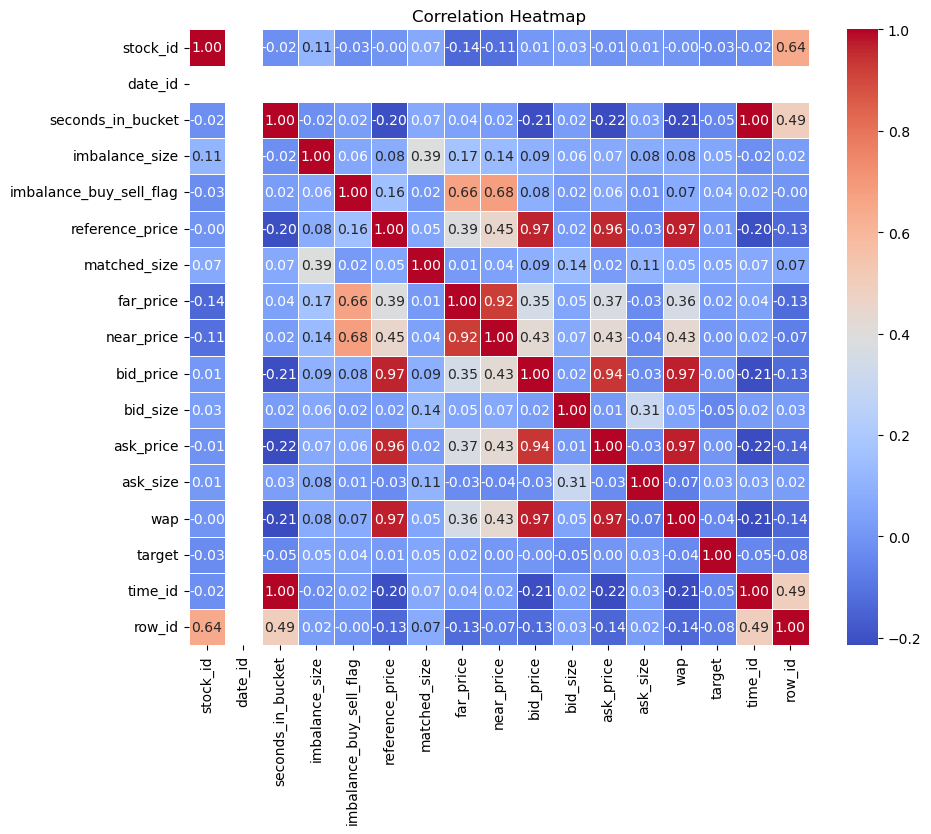

<Figure size 1200x900 with 0 Axes>

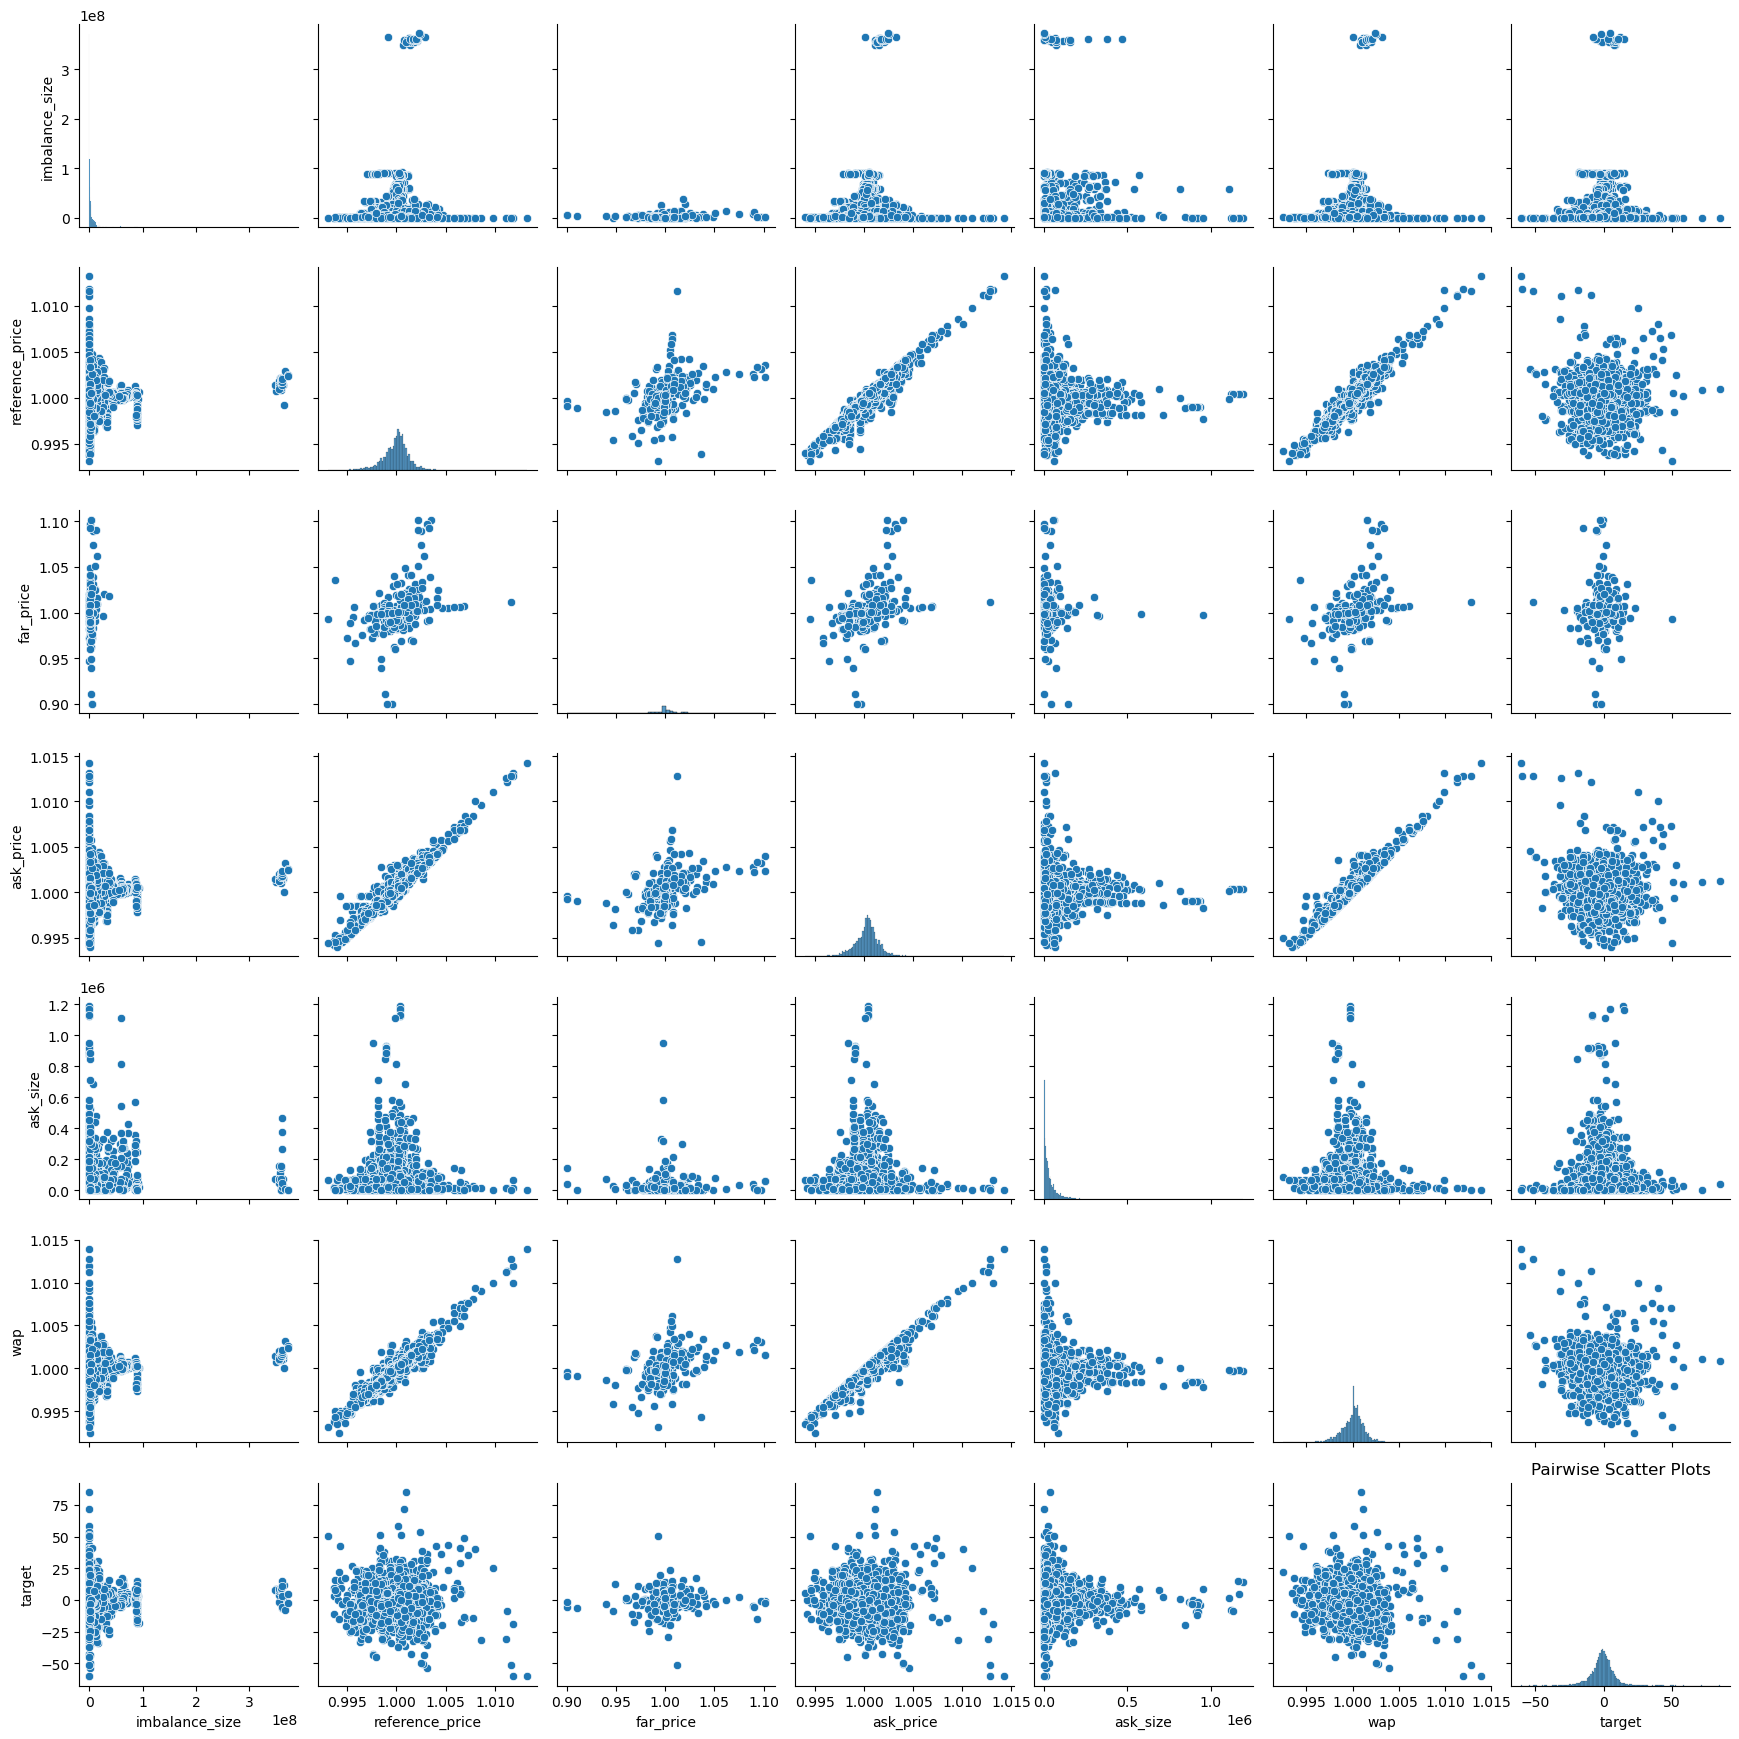

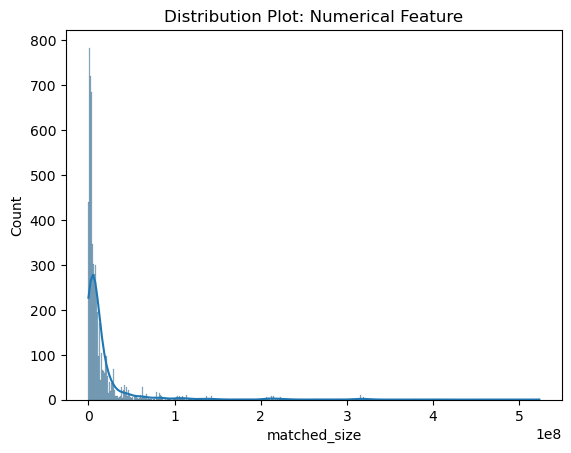

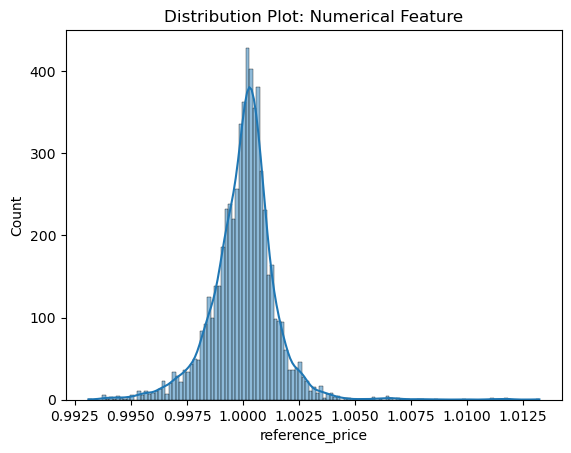

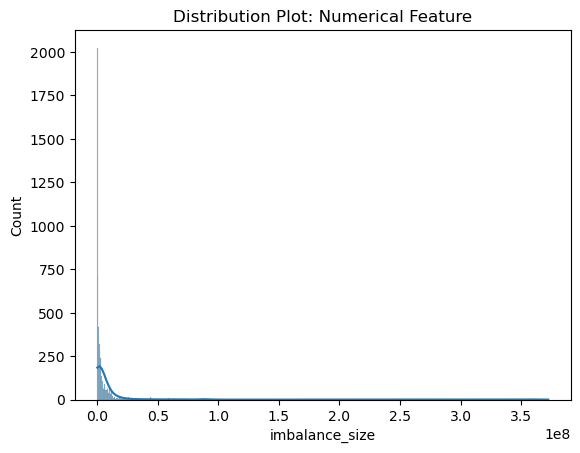

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
warnings.filterwarnings("ignore")
# Selecting numerical columns for pairwise scatter plots
numerical_columns = ['imbalance_size', 'reference_price', 'far_price','ask_price', 'ask_size',  'wap', 'target']
# Increase plot size
plt.figure(figsize=(12, 9))
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)
# Pairwise scatter plots
sns.pairplot(data, vars=numerical_columns)
plt.title('Pairwise Scatter Plots')

# Adjust figure layout to resolve warning
plt.tight_layout()

plt.show()

# Distribution plot for a numerical feature
sns.histplot(data['matched_size'], kde=True)
plt.title('Distribution Plot: Numerical Feature')
plt.show()

# Distribution plot for a numerical feature
sns.histplot(data['reference_price'], kde=True)
plt.title('Distribution Plot: Numerical Feature')
plt.show()
# Distribution plot for a numerical feature
sns.histplot(data['imbalance_size'], kde=True)
plt.title('Distribution Plot: Numerical Feature')
plt.show()

In [32]:
# function definition for setting the random seeds
from sklearn.preprocessing import MinMaxScaler
import numpy as np

class CFG:
    BATCH_SIZE = 32
    N_EPOCHS = 500
    LEARNING_RATE = 0.0001
    N_FOLDS = 5
    TARGET_COLS = ['target']
    SEED = 2023
    # Remove the line N_ASSETS = train_df['stock_id'].nunique()
    SCALER = MinMaxScaler()
    WEIGHT_DECAY = 0.4
    DEBUG = False

CFG = CFG()

# Set random seed
np.random.seed(CFG.SEED)

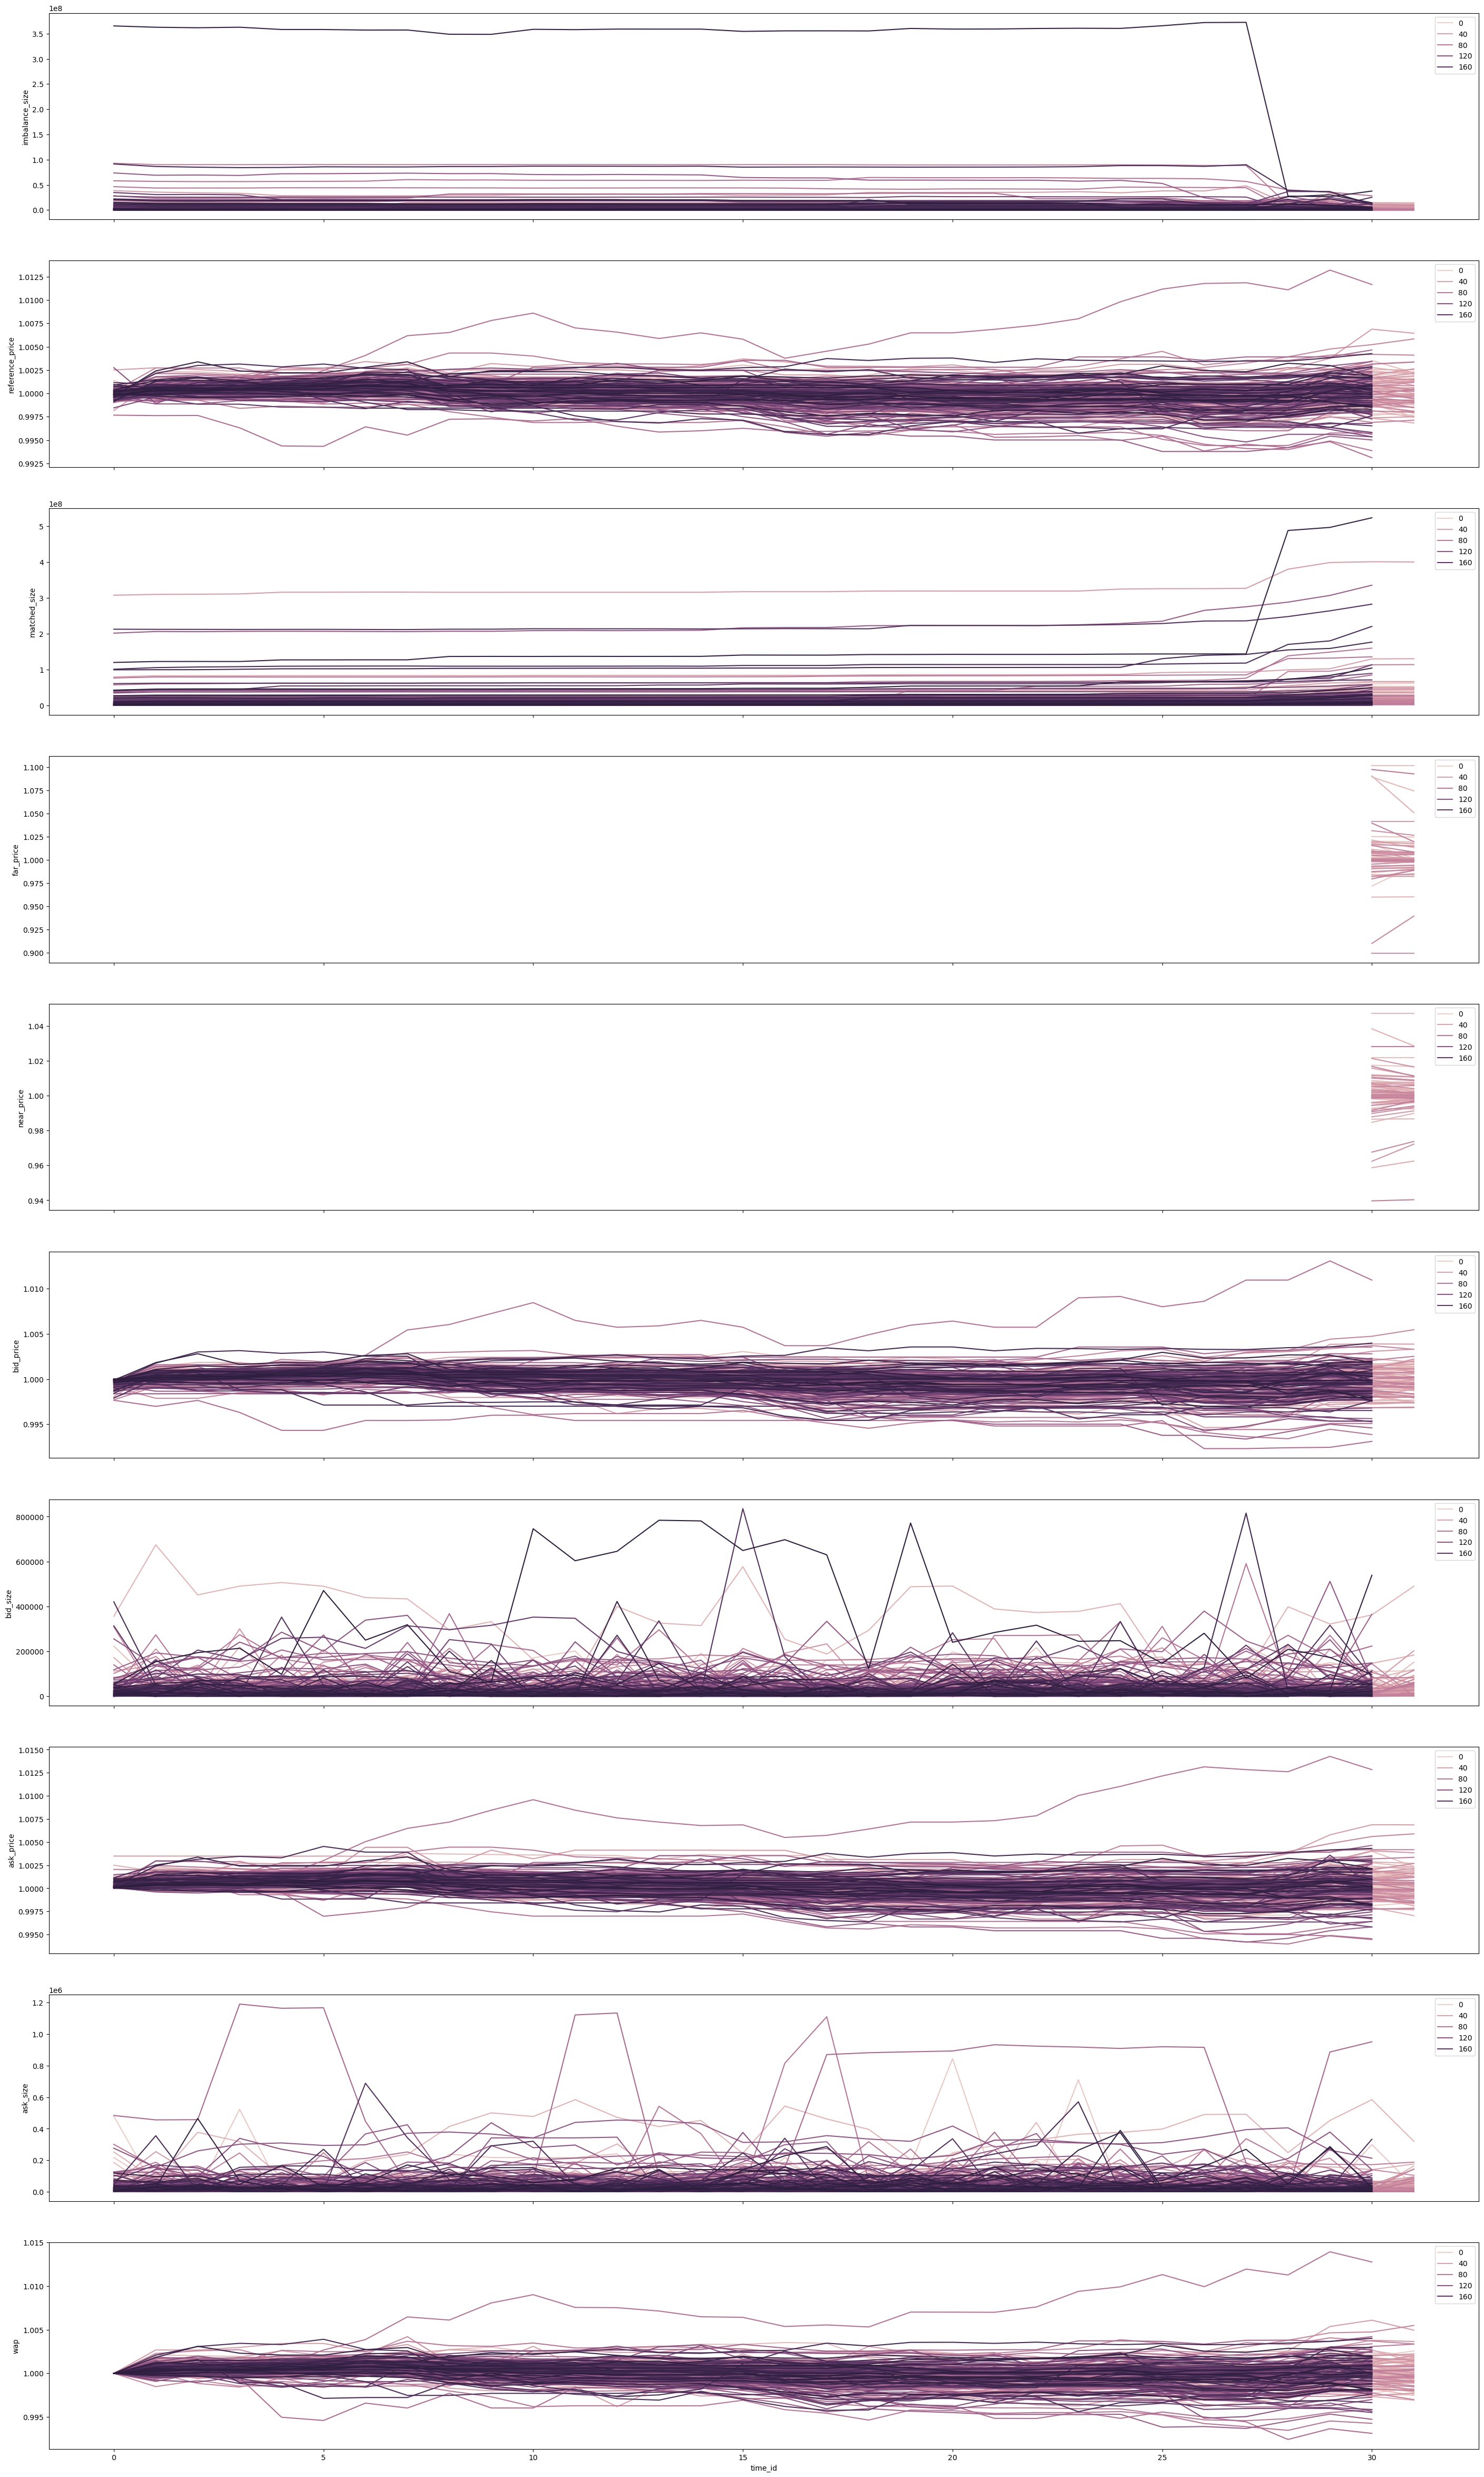

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_hist(df):
    COLS = list(df.drop(['stock_id', 'date_id', 'seconds_in_bucket', 'target', 'row_id', 'imbalance_buy_sell_flag', 'time_id'], axis=1).columns)
    fig, axes = plt.subplots(10, 1, sharex=True, figsize=(35,60))
    for col, ax in zip(COLS, axes.ravel()):
        sns.lineplot(data=df, x='time_id', y=df[col], hue='stock_id', ax=ax)
        ax.legend(loc='best')       
if not CFG.DEBUG:
    plot_hist(data)

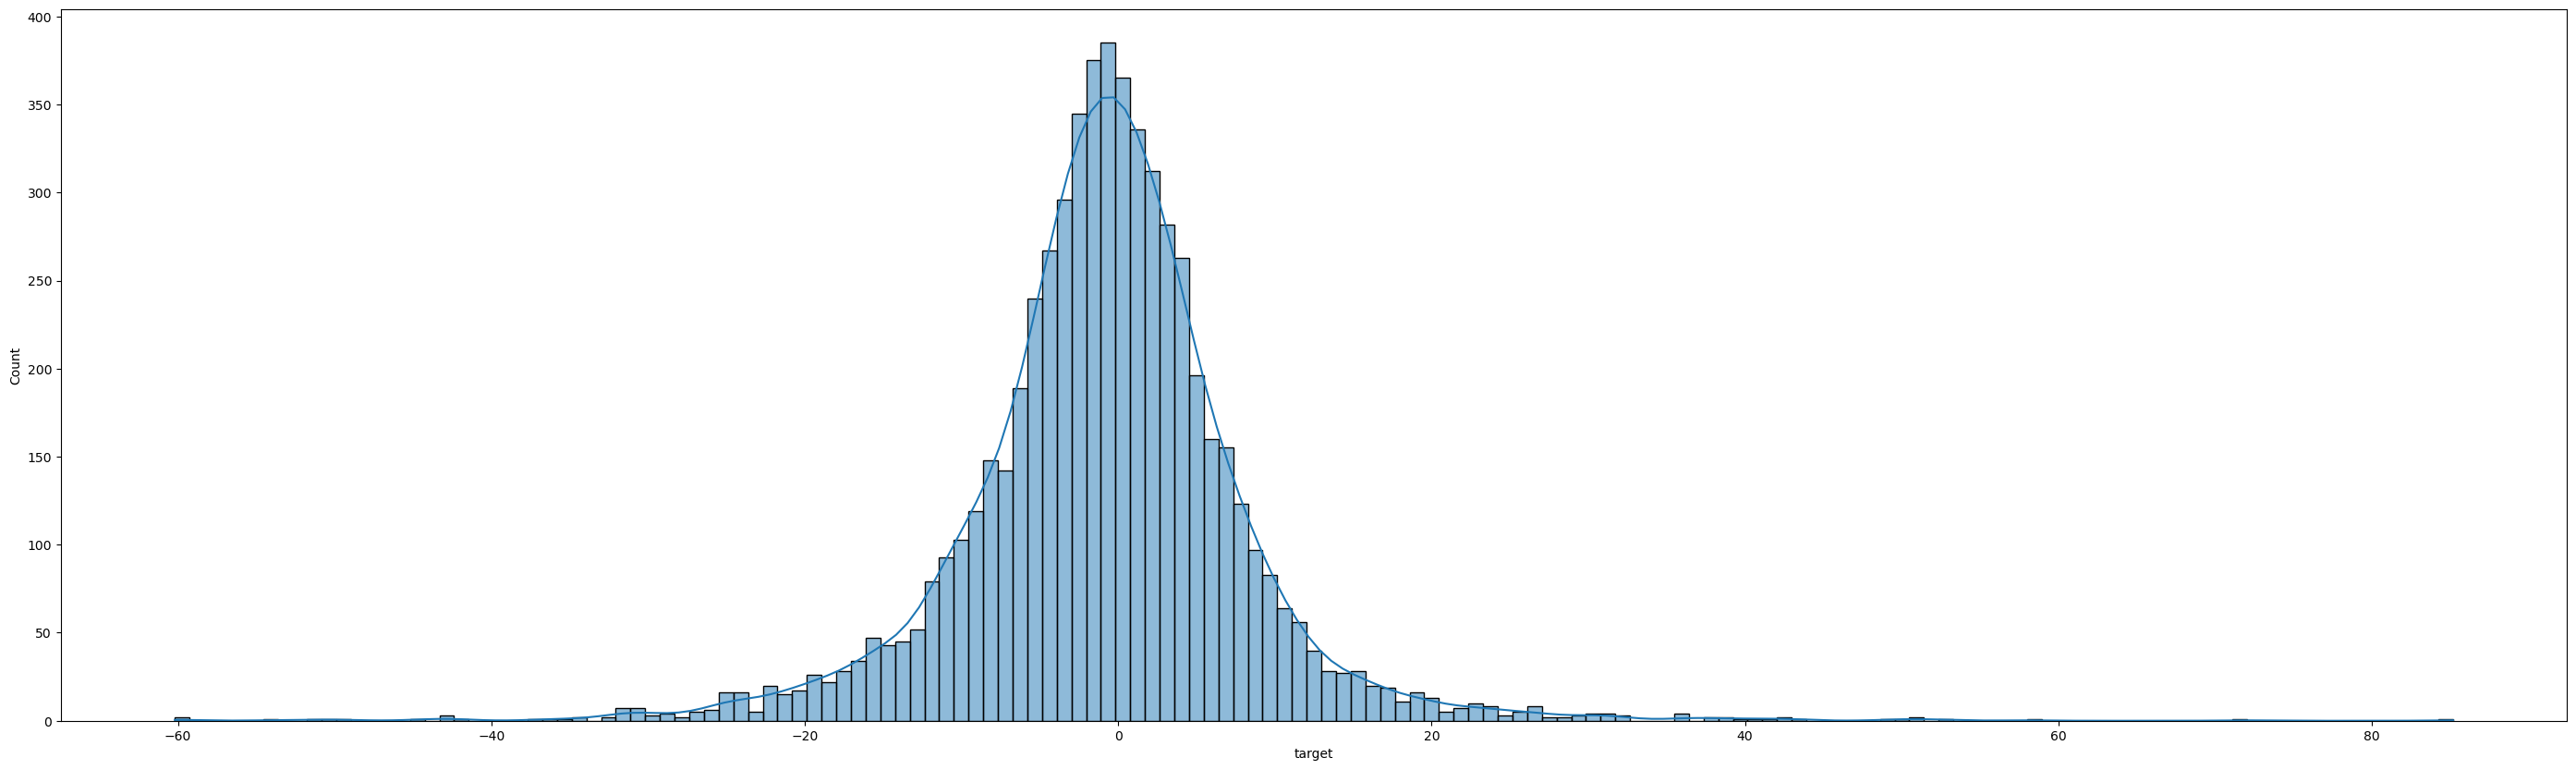

In [14]:
def plot_target(df):
    plt.figure(figsize=(35, 10))
    sns.histplot(data=df, x='target', kde=True) 
if not CFG.DEBUG:
    plot_target(data)

In [ ]:
# Feature Engineering:
# Based on your understanding of the data, consider engineering additional features that could potentially improve the predictive power of your models. 
# In this case, we are adding lagged features by shifting certain columns in the DataFrame for different time periods. 
# These lagged features capture historical data and can provide valuable information for predicting future price movements.


In [34]:

import warnings
def preprocess(df, mode='train'):
    warnings.filterwarnings("ignore")
    df['log_return'] = np.log(df['wap'])
    df.drop(['imbalance_buy_sell_flag', 'far_price', 'near_price'], axis=1, inplace=True) 
    for i in range(1, 20):
        df[f'imbalance_size_lag_{i}'] = df.groupby('stock_id')['imbalance_size'].shift(i)
        df[f'reference_price_lag_{i}'] = df.groupby('stock_id')['reference_price'].shift(i)
        df[f'matched_size_lag_{i}'] = df.groupby('stock_id')['matched_size'].shift(i)
        df[f'bid_price_lag_{i}'] = df.groupby('stock_id')['bid_price'].shift(i)
        df[f'ask_price_lag_{i}'] = df.groupby('stock_id')['ask_price'].shift(i)
        df[f'wap_{i}'] = df.groupby('stock_id')['wap'].shift(i)
    
    df['bid_size_lag_1'] = df.groupby('stock_id')['bid_size'].shift(1)
    df['ask_size_lag_1'] = df.groupby('stock_id')['ask_size'].shift(1)
    
    df.fillna(0, inplace=True)
    # Standardize
    if mode == 'train':
        cols_to_norm = df.drop(['stock_id', 'time_id', 'date_id', 'row_id', 'target'], axis=1).columns
        df[cols_to_norm] = CFG.SCALER.fit_transform(df[cols_to_norm])
    elif mode == 'test':
        cols_to_norm = df.drop(['stock_id', 'date_id', 'row_id'], axis=1).columns
        df[cols_to_norm] = CFG.SCALER.transform(df[cols_to_norm])
    else:
        print('Wrong Mode.')
    return df
    
train_df = preprocess(data)

In [35]:

train_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,...,ask_price_lag_18,wap_18,imbalance_size_lag_19,reference_price_lag_19,matched_size_lag_19,bid_price_lag_19,ask_price_lag_19,wap_19,bid_size_lag_1,ask_size_lag_1
0,0,0,0.0,0.008541,0.333549,0.025417,0.361578,0.072565,0.298044,0.007088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,0.0,0.000447,0.337725,0.002984,0.365625,0.003826,0.329277,0.017258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0,0.0,0.000813,0.321070,0.003323,0.341876,0.045395,0.311444,0.015906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0,0.0,0.032004,0.351397,0.034991,0.370586,0.002738,0.307306,0.402167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0,0.0,0.001202,0.319628,0.033980,0.341442,0.019691,0.297552,0.000321,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,74,0,1.0,0.025820,0.242617,0.048668,0.273472,0.005810,0.228336,0.058656,...,0.990642,0.990610,0.000017,0.991424,0.030416,0.991543,0.990840,0.991350,0.000836,0.005286
5995,75,0,1.0,0.007375,0.367306,0.027261,0.377908,0.090308,0.320952,0.000575,...,0.989913,0.990337,0.004415,0.991012,0.020294,0.991026,0.990047,0.990530,0.011270,0.012355
5996,76,0,1.0,0.002084,0.303918,0.011092,0.328002,0.073026,0.287797,0.016689,...,0.990622,0.990964,0.000000,0.991487,0.007115,0.991337,0.990622,0.990896,0.017045,0.024765
5997,77,0,1.0,0.003985,0.314259,0.050366,0.340479,0.100006,0.290704,0.067161,...,0.991081,0.991560,0.033973,0.992046,0.023928,0.992095,0.991081,0.991592,0.098665,0.042883


In [36]:
 # Split the data into features and target variable
X = train_df.drop(['target'], axis=1)
y = train_df['target']

# Split the dataset into train and test sets (if applicable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

In [ ]:

# Model Selection: Since you are dealing with time series data, time series models such as ARIMA, SARIMA, or Prophet 
# can be suitable options. 
# Additionally, decision tree-based models like Random Forest and K-Nearest Neighbors (KNN) can also be considered. 
# Evaluate the performance of these models and choose the one that provides the best results for your specific problem.


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
#from fbprophet import Prophet
warnings.filterwarnings("ignore")
# Time Series Model (ARIMA or Prophet)
arima_model = ARIMA(y_train, order=(1, 0, 1))
arima_model.fit()

#prophet_model = Prophet()
#prophet_model.fit(df)
# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# KNN Model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

# Evaluate the models (if applicable)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Assess the performance of the models and select the best algorithm
model_scores = {'Decision Tree': dt_mse, 'Random Forest': rf_mse, 'KNN': knn_mse}
best_model = min(model_scores, key=model_scores.get)

# Deploy the recommended model (Random Forest for price forecasting)
if best_model == 'Random Forest':
    deployed_model = rf_model
elif best_model == 'Decision Tree':
    deployed_model = dt_model
elif best_model == 'KNN':
    deployed_model = knn_model
    
print("Mean Squared Error (MSE):")
print("Decision Tree:", dt_mse)
print("Random Forest:", rf_mse)
print("KNN:", knn_mse)
print("")

print("Best Model:", best_model)
print("Deployed Model:", deployed_model)


Mean Squared Error (MSE):
Decision Tree: 42.55172591670154
Random Forest: 55.366082245275116
KNN: 24.02293799058724

Best Model: KNN
Deployed Model: KNeighborsRegressor()


In [ ]:

# Model Training and Evaluation: Split your dataset into training and testing sets, taking care to maintain the 
# temporal order of the data. 
# Train your chosen model on the training set, tune hyperparameters if necessary, and evaluate its performance on 
# the testing set. 
# Use appropriate evaluation metrics such as mean squared error (MSE) or mean absolute error (MAE) to assess the accuracy of your predictions.

#KNN model and improve its performance:

# 1) Split the dataset into training and validation sets
# 2) Perform hyperparameter tuning
# 3) Evaluate the optimized model



In [42]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import mean_squared_error

best_mse = float('inf')
best_n_neighbors = None

for n_neighbors in range(1, 11):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_val)
    mse = mean_squared_error(y_val, knn_predictions)
    if mse < best_mse:
        best_mse = mse
        best_n_neighbors = n_neighbors

print("Best n_neighbors:", best_n_neighbors)

Best n_neighbors: 10


In [43]:
knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
mse = mean_squared_error(y_test, knn_predictions)
print("Optimized KNN MSE:", mse)

Optimized KNN MSE: 37.27238556363893


In [ ]:
# Deployment: Once you have selected and trained your model, you can deploy it to make predictions on new, unseen data. 
# Make sure to follow best practices for deploying machine learning models, such as encapsulating your model in 
# a function or API that can be easily accessed.


In [ ]:
from flask import Flask, jsonify, request
from sklearn.neighbors import KNeighborsClassifier

# Create a Flask app
app = Flask(Predict_future)

# Load the trained KNN model
model = KNeighborsClassifier()

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json()
    
    # Preprocess the data if required
    # ...
    
    # Make predictions using the trained model
    predictions = model.predict(data)
    
    # Return the predictions as JSON response
    response = {'predictions': predictions.tolist()}
    return jsonify(response)
